# Start The Program

# Import Library

In [98]:
# Data manipulation
import pandas as pd
import numpy as np

# Text preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Handling imbalanced datasets
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier

# Model selection and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Machine Learning models
from sklearn.ensemble import (VotingClassifier, StackingClassifier, 
                              RandomForestClassifier, GradientBoostingClassifier, 
                              AdaBoostClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier  # Ensure you have xgboost installed

# Evaluation metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, f1_score, 
                             recall_score, precision_score, 
                             mean_absolute_error, mean_squared_error, 
                             roc_curve, roc_auc_score)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow/Keras models
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (Input, Conv1D, MaxPooling1D, Flatten, 
                                     Dense, Dropout, GlobalAveragePooling1D, 
                                     BatchNormalization, Add, Bidirectional, LSTM, 
                                     Attention)
from tensorflow.keras.utils import to_categorical

# Dataset Load

In [99]:
# Load the CSV file
data = pd.read_csv('/kaggle/input/avped-dataset/AntiVped.csv')

Class 1 data sample

In [100]:
data.head()

,Sequence,molecular \nweight,Theoretical Pi,Extinction \ncoefficient,Half life\n(hours),Instability\n index,Aliphatic\n index,GRAVY,Hydrophobic \nresidue :,Net charge:,Boman Index:\n(Kcal/mol),Protective Antigenic\n Score,Allergenicity,property = 1
0,GKPRPYSPRPTSHPRPIRV,2198.56,12.01,1490.0,30.0,41.15,35.79,-1.579,10.0,5.0,3.65,0.5017,no evidence,1
1,ACYCRIPACIAGERRYGTCIYQGRLWAFCC,3448.09,8.68,10345.0,4.4,55.71,65.33,0.3,53.0,3.0,1.07,0.4636,no evidence,1
2,FLFPLITSFLSKVL,1625.03,8.75,NaN,1.1,16.98,160.00,1.75,64.0,1.0,-1.61,0.4303,no evidence,1
3,SNDIYFNFQR,1303.40,5.55,1490.0,1.9,-6.03,39.00,-1.05,30.0,0.0,3.51,0.5745,strong evidence,1
4,GLFSVLGAVAKHVLPHVVPVIAEKL,2594.18,8.61,NaN,30.0,25.92,159.60,1.224,60.0,1.5,-1.13,0.4590,no evidence,1


Class 0 data sample

In [101]:
data.tail()

,Sequence,molecular \nweight,Theoretical Pi,Extinction \ncoefficient,Half life\n(hours),Instability\n index,Aliphatic\n index,GRAVY,Hydrophobic \nresidue :,Net charge:,Boman Index:\n(Kcal/mol),Protective Antigenic\n Score,Allergenicity,property = 1
3881,LTKYALVAVIVLCLTVLGFTLLAGDSLCEFTVKERNIEFRAVLAYEPKK,5460.56,8.00,3105.0,5.5,43.01,133.27,0.747,55.0,1.00,0.15,1.1777,no evidence,0
3882,SNTFVAVEFSWLYAISLILPCETIRVAWAPKRAYHGTSEEKRRLAPADI,5578.43,7.91,13980.0,1.9,65.50,95.71,0.033,47.0,1.25,1.27,-0.0513,no evidence,0
3883,AVPKRRKSRSNTRHRRSQWKAAAPDLVPIVVDGERRLVPRPLVRYFQQG,5749.68,12.01,6990.0,4.4,92.14,75.51,-0.967,33.0,10.25,3.52,0.9008,no evidence,0
3884,IDHRCGREATPPGKLCNDGRCCSQWGWCGTTQAYCSGKCQSQCDCNRDL,5413.04,7.68,12990.0,20.0,23.34,27.96,-0.867,33.0,1.25,2.66,1.1166,no evidence,0
3885,HLRNHFGSKPFKCNKCNYACVNKSMLNSHMKSHTNVYQYRCADCTY...,5907.77,9.43,7700.0,3.5,33.52,33.20,-0.874,32.0,8.00,2.33,0.7596,no evidence,0


# Pre-processing

In [102]:
data.shape

(3886, 14)

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0    Sequence                    3886 non-null   object 
 1   molecular 
weight            3881 non-null   float64
 2   Theoretical Pi               3881 non-null   float64
 3   Extinction 
coefficient      2896 non-null   float64
 4   Half life
(hours)            3881 non-null   float64
 5   Instability
 index           3881 non-null   float64
 6   Aliphatic
 index             3881 non-null   float64
 7   GRAVY                        3879 non-null   object 
 8   Hydrophobic 
residue :       3771 non-null   float64
 9   Net charge:                  3771 non-null   float64
 10  Boman Index:
(Kcal/mol)      3770 non-null   float64
 11  Protective Antigenic
 Score  3867 non-null   float64
 12  Allergenicity                3884 non-null   object 
 13  property = 1      

In [104]:
data.isnull().sum()

 Sequence                         0
molecular \nweight                5
Theoretical Pi                    5
Extinction \ncoefficient        990
Half life\n(hours)                5
Instability\n index               5
Aliphatic\n index                 5
GRAVY                             7
Hydrophobic \nresidue :         115
Net charge:                     115
Boman Index:\n(Kcal/mol)        116
Protective Antigenic\n Score     19
Allergenicity                     2
property = 1                      0
dtype: int64

In [105]:
data.head()

,Sequence,molecular \nweight,Theoretical Pi,Extinction \ncoefficient,Half life\n(hours),Instability\n index,Aliphatic\n index,GRAVY,Hydrophobic \nresidue :,Net charge:,Boman Index:\n(Kcal/mol),Protective Antigenic\n Score,Allergenicity,property = 1
0,GKPRPYSPRPTSHPRPIRV,2198.56,12.01,1490.0,30.0,41.15,35.79,-1.579,10.0,5.0,3.65,0.5017,no evidence,1
1,ACYCRIPACIAGERRYGTCIYQGRLWAFCC,3448.09,8.68,10345.0,4.4,55.71,65.33,0.3,53.0,3.0,1.07,0.4636,no evidence,1
2,FLFPLITSFLSKVL,1625.03,8.75,NaN,1.1,16.98,160.00,1.75,64.0,1.0,-1.61,0.4303,no evidence,1
3,SNDIYFNFQR,1303.40,5.55,1490.0,1.9,-6.03,39.00,-1.05,30.0,0.0,3.51,0.5745,strong evidence,1
4,GLFSVLGAVAKHVLPHVVPVIAEKL,2594.18,8.61,NaN,30.0,25.92,159.60,1.224,60.0,1.5,-1.13,0.4590,no evidence,1


# For Machine Learning Algorithm

In [106]:
# Convert non-numeric values to NaN for numeric columns
numeric_columns = ['molecular \nweight', 'Theoretical Pi', 'Extinction \ncoefficient', 
                   'Half life\n(hours)', 'Instability\n index', 'Aliphatic\n index', 
                   'GRAVY', 'Hydrophobic \nresidue :', 'Net charge:', 
                   'Boman Index:\n(Kcal/mol)', 'Protective Antigenic\n Score']

data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Fill missing values for numerical columns with their mean
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Fill missing values for the categorical column 'Allergenicity' with the most frequent value
data['Allergenicity'] = data['Allergenicity'].fillna(data['Allergenicity'].mode()[0])

# Clean up the column names
data.columns = data.columns.str.replace('\n', '').str.strip()

# Encode the 'Allergenicity' column using LabelEncoder
label_encoder = LabelEncoder()
data['Allergenicity'] = label_encoder.fit_transform(data['Allergenicity'])

numeric_columns = ['molecular weight', 'Extinction coefficient', 'Theoretical Pi',
                   'Half life(hours)', 'Instability index', 'Aliphatic index', 'GRAVY', 
                   'Hydrophobic residue :', 'Net charge:', 'Boman Index:(Kcal/mol)', 
                   'Protective Antigenic Score', 'Allergenicity']

scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Get unique amino acids in the dataset and create encoding
all_amino_acids = set(''.join(data['Sequence'].tolist()))
amino_acid_to_index = {amino_acid: i for i, amino_acid in enumerate(all_amino_acids)}

# Preprocess sequence data
sequences_encoded = []
for sequence in data['Sequence']:
    encoded_sequence = [amino_acid_to_index[amino_acid] for amino_acid in sequence]
    sequences_encoded.append(encoded_sequence)

# Pad the sequences
max_sequence_length = max(len(seq) for seq in sequences_encoded)
sequences_padded = pad_sequences(sequences_encoded, maxlen=max_sequence_length, padding='post')
data['Sequence_Encoded'] = sequences_padded.tolist()

# Ensure the correct target column name here
y = data['property = 1']  # Replace with the actual name of the target column

# Select the features for X
X = data[['Sequence_Encoded', 'molecular weight', 'Extinction coefficient', 'Theoretical Pi', 
          'Half life(hours)', 'Instability index', 'Aliphatic index', 'GRAVY', 
          'Hydrophobic residue :', 'Net charge:', 'Boman Index:(Kcal/mol)', 
          'Protective Antigenic Score', 'Allergenicity']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert sequence data to numpy arrays
X_train_sequences = np.array(X_train['Sequence_Encoded'].tolist())
X_test_sequences = np.array(X_test['Sequence_Encoded'].tolist())

# Flatten the sequence data
X_train_sequences_flat = X_train_sequences.reshape(X_train_sequences.shape[0], -1)
X_test_sequences_flat = X_test_sequences.reshape(X_test_sequences.shape[0], -1)

# Combine the flattened sequence data with other features
X_train_combined = np.hstack((X_train_sequences_flat, X_train.drop(columns=['Sequence_Encoded']).values))
X_test_combined = np.hstack((X_test_sequences_flat, X_test.drop(columns=['Sequence_Encoded']).values))

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_combined, y_train)

# Data Distribution

property = 1
1    2082
0    1804
Name: count, dtype: int64


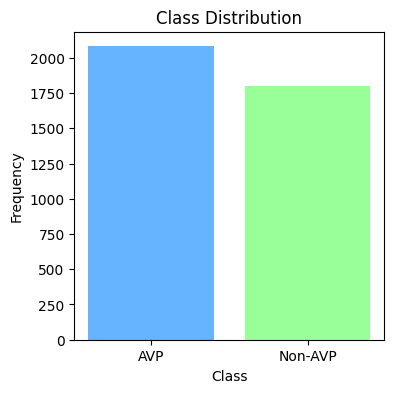

In [107]:
class_counts = data['property = 1'].value_counts()

print(class_counts)

beingsaved = plt.figure(figsize=(4, 4))
colors = ['#66b3ff', '#99ff99']
plt.bar(['AVP', 'Non-AVP'], class_counts.values, color=colors)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
beingsaved.savefig('/kaggle/working/Class_Distribution.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

Data Distribution before SMOTE for tarin set

property = 1
1    1649
0    1459
Name: count, dtype: int64


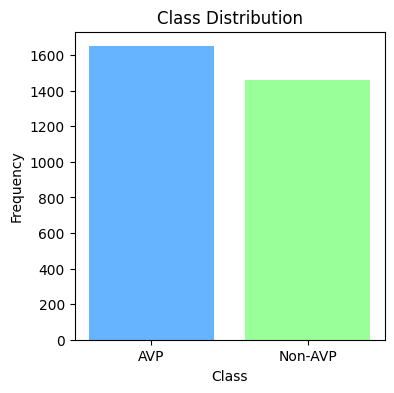

In [108]:
class_counts = y_train.value_counts()

print(class_counts)

beingsaved = plt.figure(figsize=(4, 4))
colors = ['#66b3ff', '#99ff99']
plt.bar(['AVP', 'Non-AVP'], class_counts.values, color=colors)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
beingsaved.savefig('/kaggle/working/Class_Distribution.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

Data Distribution After SMOTE for tarin set

property = 1
1    1649
0    1649
Name: count, dtype: int64


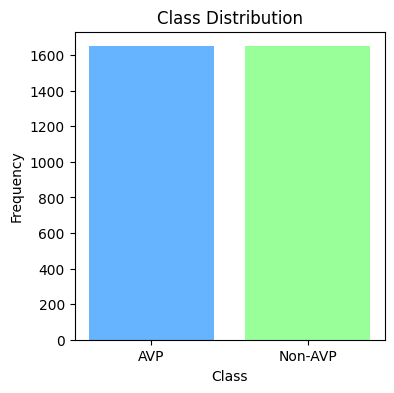

In [109]:
class_counts =  y_train_balanced.value_counts()

print(class_counts)

beingsaved = plt.figure(figsize=(4, 4))
colors = ['#66b3ff', '#99ff99']
plt.bar(['AVP', 'Non-AVP'], class_counts.values, color=colors)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
beingsaved.savefig('/kaggle/working/Class_Distribution.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

# Model Creation

In [110]:
# New ensemble classifiers
ensemble1 = VotingClassifier(estimators=[
    ('gb',GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=10, 
                                       min_samples_split=2, min_samples_leaf=1, 
                                       random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=2, 
                                   min_samples_leaf=1, max_features='sqrt', 
                                   random_state=42)),
    ('et', KNeighborsClassifier(
    n_neighbors=5,         # Number of neighbors to use for knearest neighbors
    weights='uniform',     # Weight function used in prediction ('uniform' or 'distance')
    algorithm='auto',      # Algorithm used to compute the nearest neighbors ('auto', 'ball_tree', 'kd_tree', 'brute')
    leaf_size=30,          # Leaf size passed to the underlying tree-based algorithms
    metric='minkowski'     # Distance metric to use for the tree (default is Minkowski)             # Seed for reproducibility
)),
    ('ada', AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=42 ))
], voting='soft')

ensemble2 = StackingClassifier(estimators=[
    ('gb', GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=10, 
                                       min_samples_split=2, min_samples_leaf=1, 
                                       random_state=42)),
    ('et', KNeighborsClassifier(
    n_neighbors=5,         # Number of neighbors to use for knearest neighbors
    weights='uniform',     # Weight function used in prediction ('uniform' or 'distance')
    algorithm='auto',      # Algorithm used to compute the nearest neighbors ('auto', 'ball_tree', 'kd_tree', 'brute')
    leaf_size=30,          # Leaf size passed to the underlying tree-based algorithms
    metric='minkowski'     # Distance metric to use for the tree (default is Minkowski)
)),
    ('ada', AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=42 ))
], final_estimator=RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=2, 
                                   min_samples_leaf=1, max_features='sqrt', 
                                   random_state=42))

ensemble3 = VotingClassifier(estimators=[
    ('xgb', XGBClassifier(use_label_encoder=True, eval_metric='logloss', n_estimators=200, 
                           max_depth=10, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8,
                           gamma=0, min_child_weight=1)),
    ('brf', BalancedRandomForestClassifier(
        n_estimators=200, criterion='gini', max_depth=10, 
        min_samples_split=2, min_samples_leaf=1, 
        min_weight_fraction_leaf=0.0, bootstrap=True, 
        oob_score=False, random_state=42, 
        verbose=0, class_weight='balanced', 
        min_impurity_decrease=0.0)),
    ('et', KNeighborsClassifier(
    n_neighbors=5,         # Number of neighbors to use for knearest neighbors
    weights='uniform',     # Weight function used in prediction ('uniform' or 'distance')
    algorithm='auto',      # Algorithm used to compute the nearest neighbors ('auto', 'ball_tree', 'kd_tree', 'brute')
    leaf_size=30,          # Leaf size passed to the underlying tree-based algorithms
    metric='minkowski'     # Distance metric to use for the tree (default is Minkowski)
)),
    ('ada', AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=42 ))
], voting='soft')

ensemble4 = StackingClassifier(estimators=[
    ('xgb', XGBClassifier(use_label_encoder=True, eval_metric='logloss', n_estimators=200, 
                           max_depth=10, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8,
                           gamma=0, min_child_weight=1)),
    ('et', KNeighborsClassifier(
    n_neighbors=5,         # Number of neighbors to use for knearest neighbors
    weights='uniform',     # Weight function used in prediction ('uniform' or 'distance')
    algorithm='auto',      # Algorithm used to compute the nearest neighbors ('auto', 'ball_tree', 'kd_tree', 'brute')
    leaf_size=30,          # Leaf size passed to the underlying tree-based algorithms
    metric='minkowski'     # Distance metric to use for the tree (default is Minkowski)
)),
    ('ada', AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=42 ))
], final_estimator=BalancedRandomForestClassifier(n_estimators=200, criterion='gini', max_depth=10, 
        min_samples_split=2, min_samples_leaf=1, 
        min_weight_fraction_leaf=0.0, bootstrap=True, 
        oob_score=False, random_state=42, 
        verbose=0, class_weight='balanced', 
        min_impurity_decrease=0.0))

# Machine Learning Algorithm

In [111]:
# Add this to your classifiers dictionary
classifiers = {
    'SVM': SVC(probability=True, C=1.0, gamma='scale', 
               shrinking=True, tol=1e-3, cache_size=200, verbose=False, max_iter=-1, 
               decision_function_shape='ovr', break_ties=False),
    
    'Decision Tree': DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5, 
                                            min_samples_split=2, min_samples_leaf=1),
    
    'Extra Tree': ExtraTreesClassifier(n_estimators=100, max_depth=5), 
    
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=2, 
                                   min_samples_leaf=1, random_state=42),
    
    'Logistic Regression': LogisticRegression(penalty='l2', dual=False, tol=0.0001, 
                                             C=1.0, fit_intercept=True, 
                                             intercept_scaling=1, 
                                             max_iter=100,
                                             verbose=0, warm_start=False),
    
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, max_depth=5, 
                                       min_samples_split=2, min_samples_leaf=1),
    
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5, leaf_size=30),
    
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,), activation='relu', 
                                    solver='adam', alpha=0.0001, batch_size='auto', 
                                    learning_rate='constant', learning_rate_init=0.001, 
                                    power_t=0.5, max_iter=200, shuffle=True, 
                                    random_state=None, tol=0.0001, 
                                    verbose=False, warm_start=False, 
                                    momentum=0.9, nesterovs_momentum=True, 
                                    early_stopping=False, validation_fraction=0.1, 
                                    beta_1=0.9, beta_2=0.999, epsilon=1e-08),
    
    'Naive Bayes': GaussianNB(priors=None, var_smoothing=1e-09),
    
    'AdaBoost': AdaBoostClassifier(n_estimators=100),
    
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100),
    
    'Balanced RF': BalancedRandomForestClassifier(
        n_estimators=100, random_state=42),
    
    'Ensemble 1': ensemble1,
    'Ensemble 2': ensemble2,
    'Ensemble 3': ensemble3,
    'Ensemble 4': ensemble4
}

# Result Analysis

Model: SVM
Accuracy: 0.7159383033419023
Confusion Matrix:
[[222 123]
 [ 98 335]]
F1 Score: 0.7519640852974188
Recall: 0.7736720554272517
Precision: 0.7314410480349345
Mean Absolute Error: 0.28406169665809766
Root Mean Squared Error: 0.5329743864934765
ROC AUC Score: 0.7085751581484085
Specificity: 0.6434782608695652
Matthews Correlation Coefficient: 0.42115149314035205


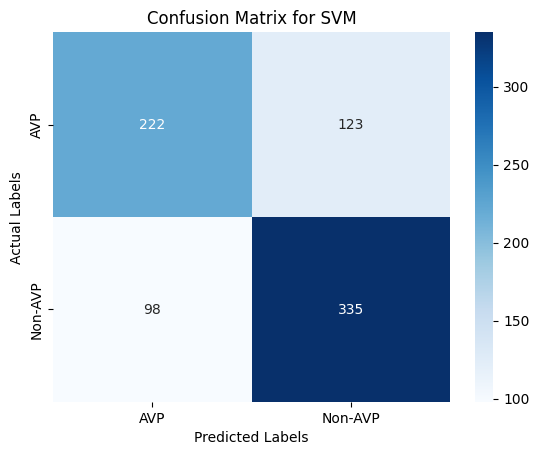

---------------------------------------
Model: Decision Tree
Accuracy: 0.7107969151670951
Confusion Matrix:
[[274  71]
 [154 279]]
F1 Score: 0.7126436781609196
Recall: 0.6443418013856813
Precision: 0.7971428571428572
Mean Absolute Error: 0.2892030848329049
Root Mean Squared Error: 0.5377760545365561
ROC AUC Score: 0.719272349968203
Specificity: 0.7942028985507247
Matthews Correlation Coefficient: 0.43793681517658245


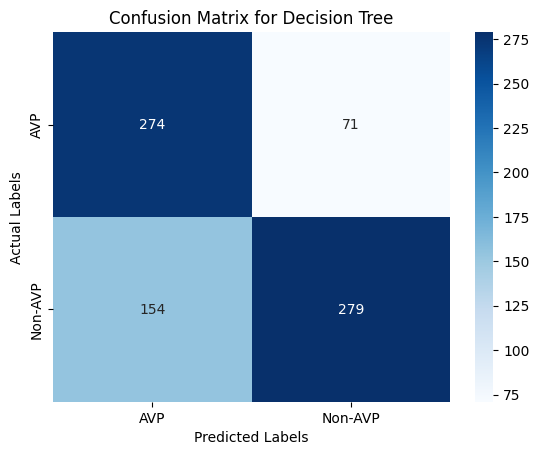

---------------------------------------
Model: Extra Tree
Accuracy: 0.6966580976863753
Confusion Matrix:
[[234 111]
 [125 308]]
F1 Score: 0.7230046948356809
Recall: 0.7113163972286374
Precision: 0.7350835322195705
Mean Absolute Error: 0.3033419023136247
Root Mean Squared Error: 0.5507648339478699
ROC AUC Score: 0.6947886333969274
Specificity: 0.6782608695652174
Matthews Correlation Coefficient: 0.3882333740274577


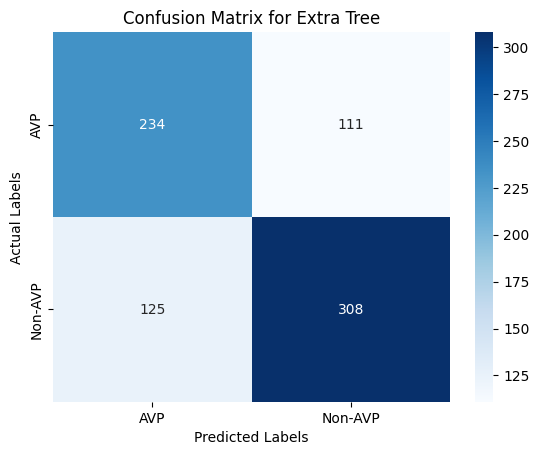

---------------------------------------
Model: Random Forest
Accuracy: 0.7429305912596401
Confusion Matrix:
[[233 112]
 [ 88 345]]
F1 Score: 0.7752808988764045
Recall: 0.7967667436489607
Precision: 0.7549234135667396
Mean Absolute Error: 0.2570694087403599
Root Mean Squared Error: 0.5070201265633938
ROC AUC Score: 0.7360645312447702
Specificity: 0.6753623188405797
Matthews Correlation Coefficient: 0.4764349517534525


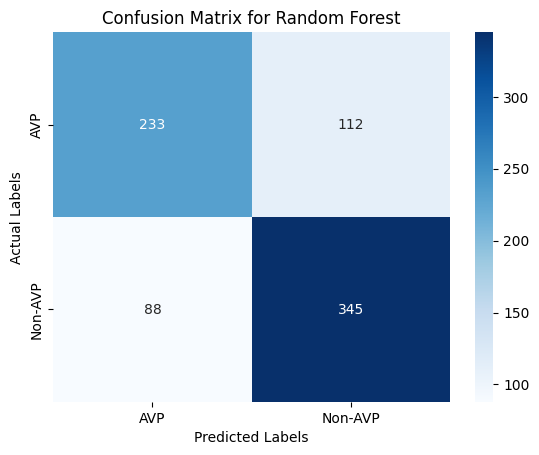

---------------------------------------
Model: Logistic Regression
Accuracy: 0.6876606683804627
Confusion Matrix:
[[228 117]
 [126 307]]
F1 Score: 0.7164527421236874
Recall: 0.7090069284064665
Precision: 0.7240566037735849
Mean Absolute Error: 0.31233933161953725
Root Mean Squared Error: 0.5588732697307479
ROC AUC Score: 0.6849382468119288
Specificity: 0.6608695652173913
Matthews Correlation Coefficient: 0.3689994070880443


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


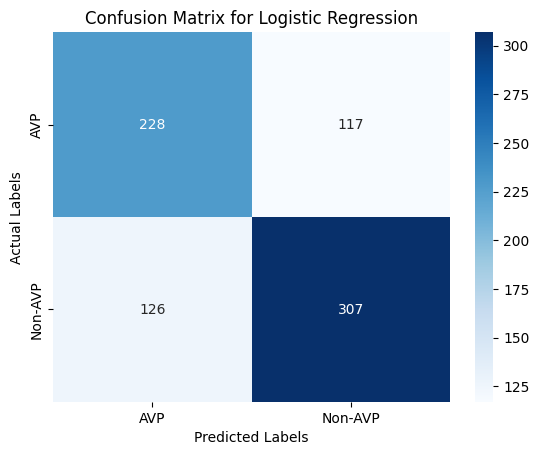

---------------------------------------
Model: Gradient Boosting
Accuracy: 0.8483290488431876
Confusion Matrix:
[[281  64]
 [ 54 379]]
F1 Score: 0.865296803652968
Recall: 0.8752886836027713
Precision: 0.8555304740406321
Mean Absolute Error: 0.15167095115681234
Root Mean Squared Error: 0.3894495489236216
ROC AUC Score: 0.8448907186129798
Specificity: 0.8144927536231884
Matthews Correlation Coefficient: 0.6920551931686243


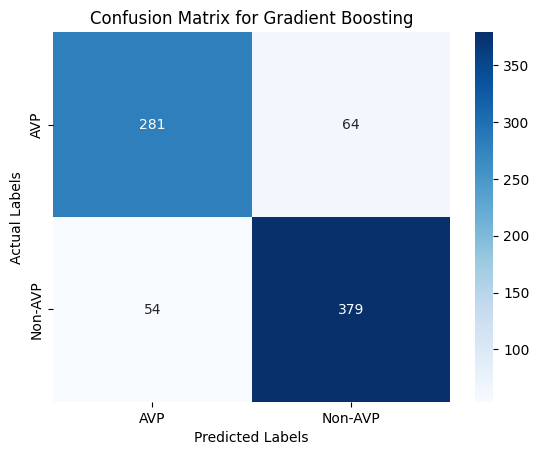

---------------------------------------
Model: K-Nearest Neighbors
Accuracy: 0.7377892030848329
Confusion Matrix:
[[236 109]
 [ 95 338]]
F1 Score: 0.7681818181818182
Recall: 0.7806004618937644
Precision: 0.756152125279642
Mean Absolute Error: 0.2622107969151671
Root Mean Squared Error: 0.5120652272075962
ROC AUC Score: 0.7323292164541286
Specificity: 0.6840579710144927
Matthews Correlation Coefficient: 0.4668953629265132


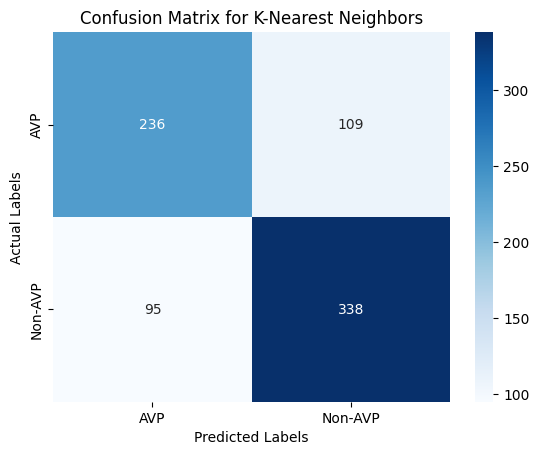

---------------------------------------
Model: Neural Network


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.7236503856041131
Confusion Matrix:
[[232 113]
 [102 331]]
F1 Score: 0.7548460661345496
Recall: 0.7644341801385681
Precision: 0.7454954954954955
Mean Absolute Error: 0.2763496143958869
Root Mean Squared Error: 0.5256896559719307
ROC AUC Score: 0.7184489741272551
Specificity: 0.672463768115942
Matthews Correlation Coefficient: 0.4384991768495305


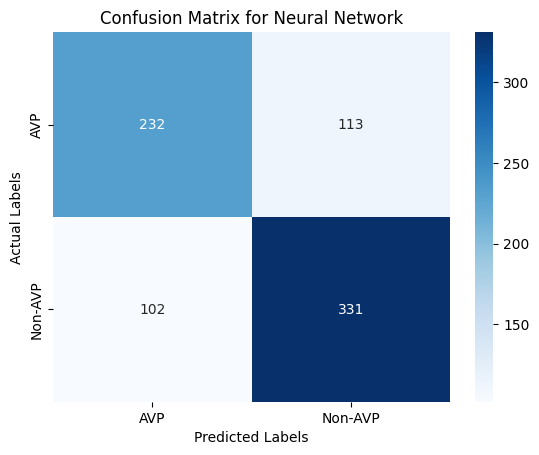

---------------------------------------
Model: Naive Bayes
Accuracy: 0.6593830334190232
Confusion Matrix:
[[171 174]
 [ 91 342]]
F1 Score: 0.720758693361433
Recall: 0.789838337182448
Precision: 0.6627906976744186
Mean Absolute Error: 0.34061696658097684
Root Mean Squared Error: 0.5836239941785951
ROC AUC Score: 0.6427452555477458
Specificity: 0.4956521739130435
Matthews Correlation Coefficient: 0.30010254422862226


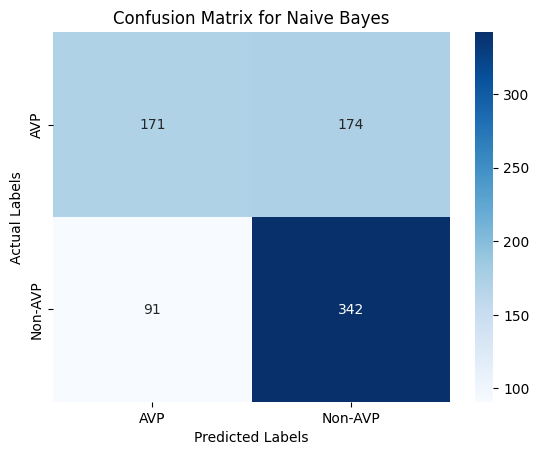

---------------------------------------
Model: AdaBoost
Accuracy: 0.7802056555269923
Confusion Matrix:
[[266  79]
 [ 92 341]]
F1 Score: 0.7995310668229777
Recall: 0.7875288683602771
Precision: 0.8119047619047619
Mean Absolute Error: 0.21979434447300772
Root Mean Squared Error: 0.46882229519617313
ROC AUC Score: 0.7792716805569502
Specificity: 0.7710144927536232
Matthews Correlation Coefficient: 0.5567294961418089


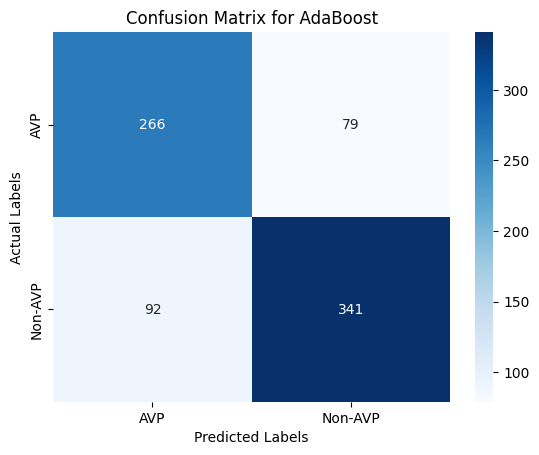

---------------------------------------
Model: XGBoost
Accuracy: 0.8496143958868895
Confusion Matrix:
[[282  63]
 [ 54 379]]
F1 Score: 0.8662857142857143
Recall: 0.8752886836027713
Precision: 0.8574660633484162
Mean Absolute Error: 0.15038560411311053
Root Mean Squared Error: 0.3877958278696543
ROC AUC Score: 0.8463399939752987
Specificity: 0.8173913043478261
Matthews Correlation Coefficient: 0.6947128996471614


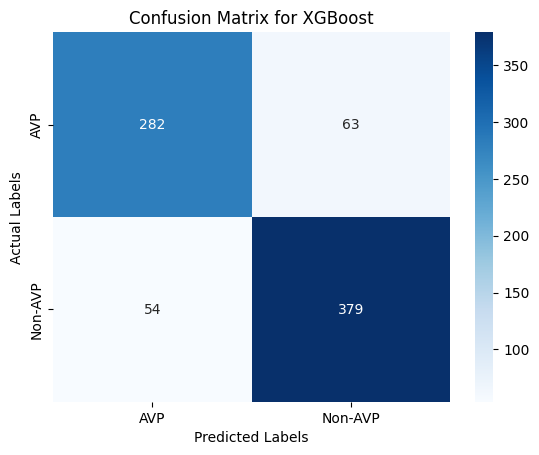

---------------------------------------
Model: Balanced RF


/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


Accuracy: 0.8316195372750642
Confusion Matrix:
[[278  67]
 [ 64 369]]
F1 Score: 0.8492520138089757
Recall: 0.8521939953810623
Precision: 0.8463302752293578
Mean Absolute Error: 0.16838046272493573
Root Mean Squared Error: 0.41034188517008074
ROC AUC Score: 0.8289955484151688
Specificity: 0.8057971014492754
Matthews Correlation Coefficient: 0.6585931591241587


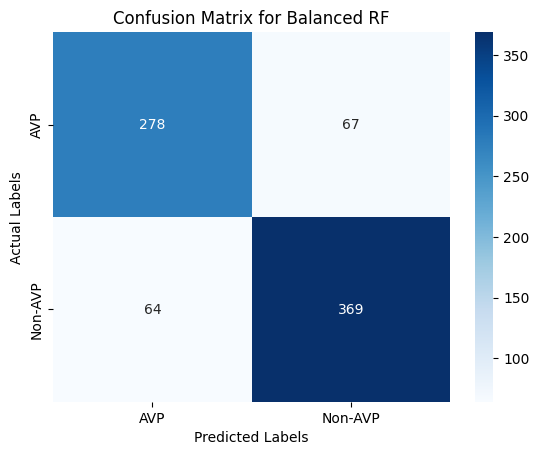

---------------------------------------
Model: Ensemble 1
Accuracy: 0.8598971722365039
Confusion Matrix:
[[284  61]
 [ 48 385]]
F1 Score: 0.875995449374289
Recall: 0.8891454965357968
Precision: 0.8632286995515696
Mean Absolute Error: 0.14010282776349614
Root Mean Squared Error: 0.37430312283428274
ROC AUC Score: 0.8561669511664491
Specificity: 0.8231884057971014
Matthews Correlation Coefficient: 0.7154851739100512


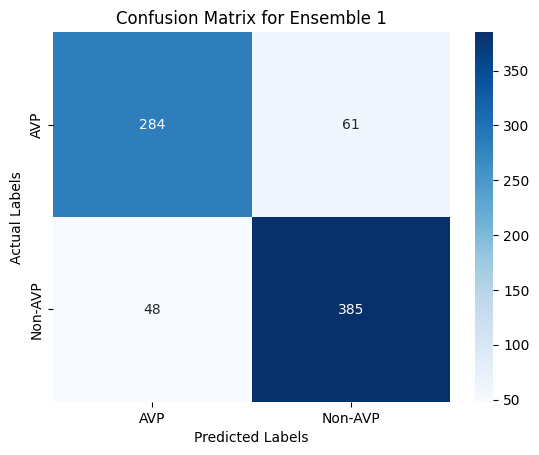

---------------------------------------
Model: Ensemble 2
Accuracy: 0.8406169665809768
Confusion Matrix:
[[283  62]
 [ 62 371]]
F1 Score: 0.8568129330254042
Recall: 0.8568129330254042
Precision: 0.8568129330254042
Mean Absolute Error: 0.15938303341902313
Root Mean Squared Error: 0.3992280468842628
ROC AUC Score: 0.838551394048934
Specificity: 0.8202898550724638
Matthews Correlation Coefficient: 0.677102788097868


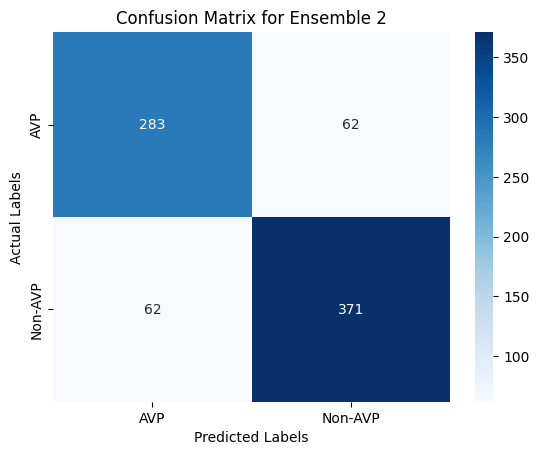

---------------------------------------
Model: Ensemble 3


/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Accuracy: 0.8329048843187661
Confusion Matrix:
[[273  72]
 [ 58 375]]
F1 Score: 0.8522727272727272
Recall: 0.8660508083140878
Precision: 0.8389261744966443
Mean Absolute Error: 0.16709511568123395
Root Mean Squared Error: 0.4087726943929033
ROC AUC Score: 0.8286775780700872
Specificity: 0.7913043478260869
Matthews Correlation Coefficient: 0.6605197548588978


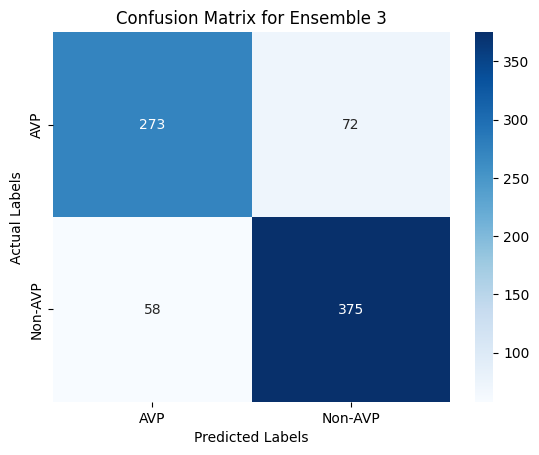

---------------------------------------
Model: Ensemble 4


/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Accuracy: 0.8226221079691517
Confusion Matrix:
[[278  67]
 [ 71 362]]
F1 Score: 0.8399071925754059
Recall: 0.836027713625866
Precision: 0.8438228438228438
Mean Absolute Error: 0.17737789203084833
Root Mean Squared Error: 0.42116254822912297
ROC AUC Score: 0.8209124075375707
Specificity: 0.8057971014492754
Matthews Correlation Coefficient: 0.6411042272330275


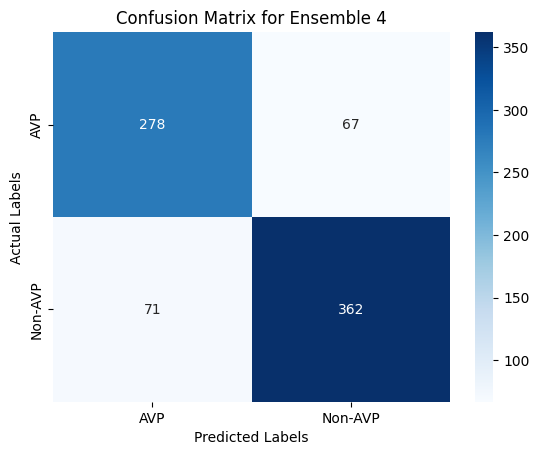

---------------------------------------


In [112]:
# Initialize lists for ROC data
roc_data = {}

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    print(f"Model: {name}")
    
    classifier.fit(X_train_balanced, y_train_balanced)
    y_pred = classifier.predict(X_test_combined)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix:\n{cm}")

    # Calculate F1 score, precision, recall, etc.
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Calculate Specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    # Calculate Matthews Correlation Coefficient
    mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5 if (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn) > 0 else 0

    print(f"F1 Score: {f1}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"ROC AUC Score: {roc_auc}")
    print(f"Specificity: {specificity}")
    print(f"Matthews Correlation Coefficient: {mcc}")

    # Create and save a heatmap of the confusion matrix
    plt.figure()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
                xticklabels=["AVP", "Non-AVP"], yticklabels=["AVP", "Non-AVP"])
    plt.xlabel("Predicted Labels")
    plt.ylabel("Actual Labels")
    plt.title(f"Confusion Matrix for {name}")
    
    # Save the confusion matrix as an image file
    plt.savefig(f'Confusion_{name}.png', format='png', dpi=600, bbox_inches="tight")
    plt.show()  # Close the plot to avoid display

    # Store ROC curve data
    y_prob = classifier.predict_proba(X_test_combined)[:, 1]  # Probability estimates for the positive class
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    
    # Ensure ROC curve starts at (0, 0)
    fpr = np.concatenate([[0], fpr])  # Add 0 at the start
    tpr = np.concatenate([[0], tpr])  # Add 0 at the start
    roc_data[name] = (fpr, tpr, roc_auc)

    print("---------------------------------------")

# Li et al. 2020 (DeepAVP)

Epoch 1/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.5921 - loss: 0.9967 - val_accuracy: 0.6586 - val_loss: 0.6133
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6720 - loss: 0.6094 - val_accuracy: 0.6616 - val_loss: 0.5968
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6964 - loss: 0.5867 - val_accuracy: 0.6606 - val_loss: 0.5992
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6869 - loss: 0.5977 - val_accuracy: 0.6778 - val_loss: 0.5804
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6959 - loss: 0.5604 - val_accuracy: 0.6737 - val_loss: 0.5778
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7002 - loss: 0.5620 - val_accuracy: 0.7091 - val_loss: 0.5666
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7185 - loss: 0.5418 - val_accuracy: 0.7030 - val_loss: 0.5721
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7498 - loss: 0.5141 - val_accuracy: 0.

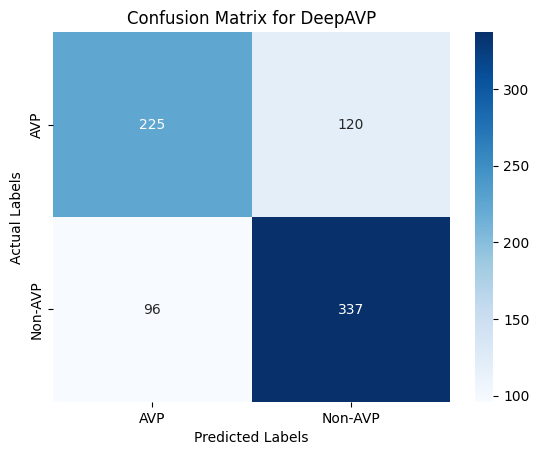

In [113]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Conv1D, Flatten, Concatenate
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (f1_score, recall_score, precision_score, 
                             mean_absolute_error, mean_squared_error, 
                             roc_auc_score, confusion_matrix, roc_curve, accuracy_score)
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('/kaggle/input/avped-dataset/AntiVped.csv')

# Data preprocessing
numeric_columns = ['molecular \nweight', 'Theoretical Pi', 'Extinction \ncoefficient', 
                   'Half life\n(hours)', 'Instability\n index', 'Aliphatic\n index', 
                   'GRAVY', 'Hydrophobic \nresidue :', 'Net charge:', 
                   'Boman Index:\n(Kcal/mol)', 'Protective Antigenic\n Score']

data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
data['Allergenicity'] = data['Allergenicity'].fillna(data['Allergenicity'].mode()[0])
data.columns = data.columns.str.replace('\n', '').str.strip()

label_encoder = LabelEncoder()
data['Allergenicity'] = label_encoder.fit_transform(data['Allergenicity'])

# Encode sequences
all_amino_acids = set(''.join(data['Sequence'].tolist()))
amino_acid_to_index = {amino_acid: i for i, amino_acid in enumerate(all_amino_acids)}

sequences_encoded = []
for sequence in data['Sequence']:
    encoded_sequence = [amino_acid_to_index[amino_acid] for amino_acid in sequence]
    sequences_encoded.append(encoded_sequence)

# Pad the sequences
max_sequence_length = max(len(seq) for seq in sequences_encoded)
sequences_padded = pad_sequences(sequences_encoded, maxlen=max_sequence_length, padding='post')
data['Sequence_Encoded'] = sequences_padded.tolist()

# Define target and features
y = data['property = 1']  # Replace with the actual name of the target column
X = data[['Sequence_Encoded', 'molecular weight', 'Extinction coefficient', 'Theoretical Pi', 
          'Half life(hours)', 'Instability index', 'Aliphatic index', 'GRAVY', 
          'Hydrophobic residue :', 'Net charge:', 'Boman Index:(Kcal/mol)', 
          'Protective Antigenic Score', 'Allergenicity']]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prepare sequence data
X_train_sequences = np.array(X_train['Sequence_Encoded'].tolist())
X_test_sequences = np.array(X_test['Sequence_Encoded'].tolist())

# Reshape for LSTM input
X_train_sequences_reshaped = X_train_sequences.reshape(X_train_sequences.shape[0], max_sequence_length, 1)
X_test_sequences_reshaped = X_test_sequences.reshape(X_test_sequences.shape[0], max_sequence_length, 1)

# Combine additional features
X_train_combined = np.hstack((X_train_sequences.reshape(X_train_sequences.shape[0], -1), 
                               X_train.drop(columns=['Sequence_Encoded']).values))
X_test_combined = np.hstack((X_test_sequences.reshape(X_test_sequences.shape[0], -1), 
                              X_test.drop(columns=['Sequence_Encoded']).values))

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_combined, y_train)

# Reshape the sequence data for LSTM input
X_train_balanced_sequences = X_train_balanced[:, :max_sequence_length]  # Sequence part
X_train_balanced_reshaped = X_train_balanced_sequences.reshape(-1, max_sequence_length, 1)

# Convert target variable to categorical
num_classes = len(np.unique(y))
y_train_balanced_categorical = to_categorical(y_train_balanced, num_classes=num_classes)

# Create the model
def build_hybrid_model(input_shape):
    inputs = Input(shape=input_shape)
    
    # LSTM Channel
    lstm_out = LSTM(64)(inputs)
    lstm_out = Dropout(0.5)(lstm_out)
    
    # CNN Channel
    conv_out = Conv1D(32, kernel_size=3, activation='relu')(inputs)
    conv_out = Dropout(0.5)(conv_out)
    conv_out = Flatten()(conv_out)
    
    # Concatenate both channels
    combined = Concatenate()([lstm_out, conv_out])
    dense_out = Dense(64, activation='relu')(combined)
    output = Dense(num_classes, activation='softmax' if num_classes > 2 else 'sigmoid')(dense_out)
    
    # Model setup
    model = Model(inputs, output)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy' if num_classes > 2 else 'binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize the model
DeepAVP = build_hybrid_model((max_sequence_length, 1))

# Train the model
DeepAVP.fit(X_train_balanced_reshaped, y_train_balanced_categorical, 
            epochs=100, batch_size=32, validation_split=0.3)

# Evaluate the model
X_test_sequences_reshaped = X_test_sequences.reshape(X_test_sequences.shape[0], max_sequence_length, 1)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)

DeepAVP_loss, DeepAVP_accuracy = DeepAVP.evaluate(X_test_sequences_reshaped, y_test_categorical)
print(f'DeepAVP Accuracy: {DeepAVP_accuracy:.4f}')

# Collect ROC data for the DeepAVP model
y_pred_probs = DeepAVP.predict(X_test_sequences_reshaped)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate metrics
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
roc_auc = roc_auc_score(y_test_categorical, y_pred_probs, multi_class='ovr')
cm = confusion_matrix(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Calculate Matthews Correlation Coefficient
mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5 if (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn) > 0 else 0

# Print metrics
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

# Create and save a heatmap of the confusion matrix
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=["AVP", "Non-AVP"], yticklabels=["AVP", "Non-AVP"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for DeepAVP")
plt.savefig('Confusion_DeepAVP.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

# Store ROC curve data
fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1])  # Assuming binary classification
roc_data['DeepAVP'] = (fpr, tpr, roc_auc)

# Singh et al. 2020 (Deep-AVPiden)

Epoch 1/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.5193 - loss: 2.7802 - val_accuracy: 0.6030 - val_loss: 0.7497
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5921 - loss: 0.8798 - val_accuracy: 0.6505 - val_loss: 0.6313
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6286 - loss: 0.6475 - val_accuracy: 0.6242 - val_loss: 0.6502
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6288 - loss: 0.6499 - val_accuracy: 0.6444 - val_loss: 0.6530
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6677 - loss: 0.6299 - val_accuracy: 0.6253 - val_loss: 0.6587
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6245 - loss: 0.6475 - val_accuracy: 0.6384 - val_loss: 0.6573
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6319 - loss: 0.6479 - val_accuracy: 0.6242 - val_loss: 0.6644
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6288 - loss: 0.6472 - val_accuracy: 0.

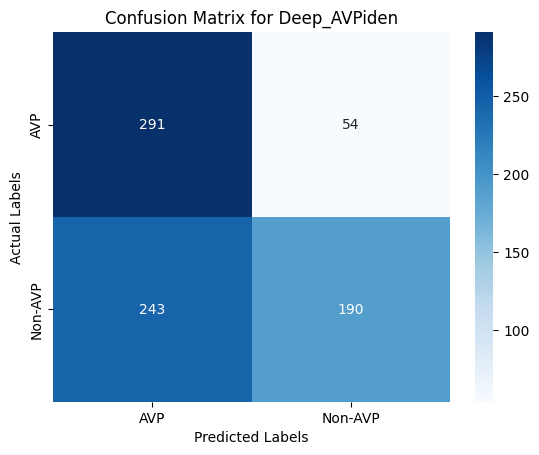

In [114]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, Dense, Dropout, Add, BatchNormalization, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (f1_score, recall_score, precision_score, 
                             mean_absolute_error, mean_squared_error, 
                             roc_auc_score, confusion_matrix, roc_curve, accuracy_score)
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('/kaggle/input/avped-dataset/AntiVped.csv')

# Data preprocessing
numeric_columns = ['molecular \nweight', 'Theoretical Pi', 'Extinction \ncoefficient', 
                   'Half life\n(hours)', 'Instability\n index', 'Aliphatic\n index', 
                   'GRAVY', 'Hydrophobic \nresidue :', 'Net charge:', 
                   'Boman Index:\n(Kcal/mol)', 'Protective Antigenic\n Score']

data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Fill missing values
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
data['Allergenicity'] = data['Allergenicity'].fillna(data['Allergenicity'].mode()[0])

data.columns = data.columns.str.replace('\n', '').str.strip()

label_encoder = LabelEncoder()
data['Allergenicity'] = label_encoder.fit_transform(data['Allergenicity'])

# Encode sequences
all_amino_acids = set(''.join(data['Sequence'].tolist()))
amino_acid_to_index = {amino_acid: i for i, amino_acid in enumerate(all_amino_acids)}

sequences_encoded = []
for sequence in data['Sequence']:
    encoded_sequence = [amino_acid_to_index[amino_acid] for amino_acid in sequence]
    sequences_encoded.append(encoded_sequence)

# Pad the sequences
max_sequence_length = max(len(seq) for seq in sequences_encoded)
sequences_padded = pad_sequences(sequences_encoded, maxlen=max_sequence_length, padding='post')
data['Sequence_Encoded'] = sequences_padded.tolist()

# Ensure the correct target column name here
y = data['property = 1']  # Adjust this line as needed

# Select features
X = data[['Sequence_Encoded', 'molecular weight', 'Extinction coefficient', 'Theoretical Pi', 
          'Half life(hours)', 'Instability index', 'Aliphatic index', 'GRAVY', 
          'Hydrophobic residue :', 'Net charge:', 'Boman Index:(Kcal/mol)', 
          'Protective Antigenic Score', 'Allergenicity']]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert sequence data to numpy arrays
X_train_sequences = np.array(X_train['Sequence_Encoded'].tolist())
X_test_sequences = np.array(X_test['Sequence_Encoded'].tolist())

# Reshape to fit input shape
X_train_sequences_reshaped = X_train_sequences.reshape(X_train_sequences.shape[0], max_sequence_length, 1)
X_test_sequences_reshaped = X_test_sequences.reshape(X_test_sequences.shape[0], max_sequence_length, 1)

# Combine additional features
X_train_combined = np.hstack((X_train_sequences.reshape(X_train_sequences.shape[0], -1), 
                               X_train.drop(columns=['Sequence_Encoded']).values))
X_test_combined = np.hstack((X_test_sequences.reshape(X_test_sequences.shape[0], -1), 
                              X_test.drop(columns=['Sequence_Encoded']).values))

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_combined, y_train)

# Split the balanced dataset back to sequence and other features
X_train_balanced_sequences = X_train_balanced[:, :max_sequence_length]  # Sequence part

# Reshape the sequence data for TCN input
X_train_balanced_reshaped = X_train_balanced_sequences.reshape(-1, max_sequence_length, 1)

# Define Temporal Convolutional Block
def tcn_block(inputs, filters, kernel_size, dilation_rate):
    x = Conv1D(filters, kernel_size, dilation_rate=dilation_rate, padding="causal", activation="relu")(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Conv1D(filters, kernel_size, dilation_rate=dilation_rate, padding="causal", activation="relu")(x)
    x = BatchNormalization()(x)
    return Add()([inputs, x])  # Residual connection

# Build Model
def build_model(input_shape):
    inputs = Input(shape=input_shape)
    x = tcn_block(inputs, filters=32, kernel_size=3, dilation_rate=1)
    x = tcn_block(x, filters=32, kernel_size=3, dilation_rate=2)
    x = GlobalAveragePooling1D()(x)
    x = Dense(64, activation="relu")(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation="sigmoid")(x)  # Single output for binary classification
    
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])
    return model

# Build and train the model
Deep_AVPiden = build_model((max_sequence_length, 1))

# Train the model
Deep_AVPiden.fit(X_train_balanced_reshaped, y_train_balanced, 
          epochs=100, batch_size=32, validation_split=0.3)

# Evaluate the model
X_test_sequences_reshaped = X_test_sequences.reshape(X_test_sequences.shape[0], max_sequence_length, 1)
Deep_AVPiden_loss, Deep_AVPiden_accuracy = Deep_AVPiden.evaluate(X_test_sequences_reshaped, y_test)
print(f'Deep_AVPiden Accuracy: {Deep_AVPiden_accuracy:.4f}')

# Collect ROC data for the Deep_AVPiden model
y_pred_probs = Deep_AVPiden.predict(X_test_sequences_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # Binarize predictions

# Calculate metrics
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
roc_auc = roc_auc_score(y_test, y_pred_probs)  # For binary classification
cm = confusion_matrix(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Calculate Matthews Correlation Coefficient
mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5 if (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn) > 0 else 0

# Print metrics
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

# Create and save a heatmap of the confusion matrix
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=["AVP", "Non-AVP"], yticklabels=["AVP", "Non-AVP"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for Deep_AVPiden")
plt.savefig('Confusion_Deep_AVPiden.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

# Store ROC curve data
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)  # Assuming binary classification
roc_data['Deep_AVPiden'] = (fpr, tpr, roc_auc)

# Sharma et al. 2021 (Deep_AVPpred)

Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.5920 - loss: 0.8183 - val_accuracy: 0.6773 - val_loss: 0.6013
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6503 - loss: 0.6345 - val_accuracy: 0.6576 - val_loss: 0.6274
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6659 - loss: 0.6086 - val_accuracy: 0.6091 - val_loss: 0.6905
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6696 - loss: 0.6153 - val_accuracy: 0.6045 - val_loss: 0.7283
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6668 - loss: 0.6066 - val_accuracy: 0.4197 - val_loss: 0.7765
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6721 - loss: 0.6124 - val_accuracy: 0.5985 - val_loss: 0.6811
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6915 - loss: 0.5871 - val_accuracy: 0.6470 - val_loss: 0.6170
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7108 - loss: 0.5906 - val_accuracy: 0.

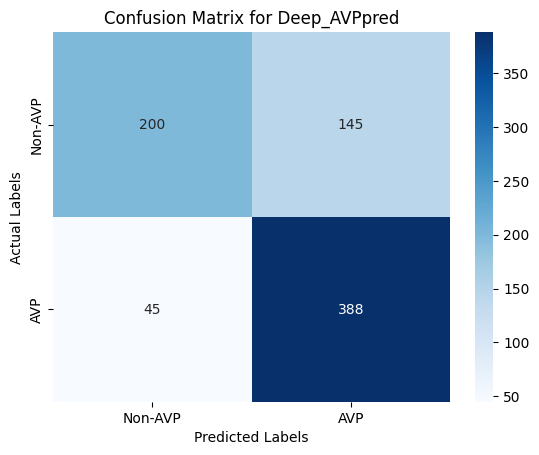

In [115]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, GlobalAveragePooling1D, Input, BatchNormalization, Add
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (f1_score, recall_score, precision_score, 
                             mean_absolute_error, mean_squared_error, 
                             roc_auc_score, confusion_matrix, roc_curve)
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('/kaggle/input/avped-dataset/AntiVped.csv')

# Data preprocessing
numeric_columns = ['molecular \nweight', 'Theoretical Pi', 'Extinction \ncoefficient', 
                   'Half life\n(hours)', 'Instability\n index', 'Aliphatic\n index', 
                   'GRAVY', 'Hydrophobic \nresidue :', 'Net charge:', 
                   'Boman Index:\n(Kcal/mol)', 'Protective Antigenic\n Score']

data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Fill missing values
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
data['Allergenicity'] = data['Allergenicity'].fillna(data['Allergenicity'].mode()[0])

data.columns = data.columns.str.replace('\n', '').str.strip()

label_encoder = LabelEncoder()
data['Allergenicity'] = label_encoder.fit_transform(data['Allergenicity'])

# Encode sequences
all_amino_acids = set(''.join(data['Sequence'].tolist()))
amino_acid_to_index = {amino_acid: i for i, amino_acid in enumerate(all_amino_acids)}

sequences_encoded = []
for sequence in data['Sequence']:
    encoded_sequence = [amino_acid_to_index[amino_acid] for amino_acid in sequence]
    sequences_encoded.append(encoded_sequence)

# Pad the sequences
max_sequence_length = max(len(seq) for seq in sequences_encoded)
sequences_padded = pad_sequences(sequences_encoded, maxlen=max_sequence_length, padding='post')
data['Sequence_Encoded'] = sequences_padded.tolist()

# Ensure the correct target column name here
y = data['property = 1']  # Adjust based on your dataset

# Select features
X = data[['Sequence_Encoded', 'molecular weight', 'Extinction coefficient', 'Theoretical Pi', 
          'Half life(hours)', 'Instability index', 'Aliphatic index', 'GRAVY', 
          'Hydrophobic residue :', 'Net charge:', 'Boman Index:(Kcal/mol)', 
          'Protective Antigenic Score', 'Allergenicity']]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert sequence data to numpy arrays
X_train_sequences = np.array(X_train['Sequence_Encoded'].tolist())
X_test_sequences = np.array(X_test['Sequence_Encoded'].tolist())

# Flatten the sequence data
X_train_sequences_flat = X_train_sequences.reshape(X_train_sequences.shape[0], -1)
X_test_sequences_flat = X_test_sequences.reshape(X_test_sequences.shape[0], -1)

# Combine the flattened sequence data with other features
X_train_combined = np.hstack((X_train_sequences_flat, X_train.drop(columns=['Sequence_Encoded']).values))
X_test_combined = np.hstack((X_test_sequences_flat, X_test.drop(columns=['Sequence_Encoded']).values))

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_combined, y_train)

# Convert target variable to categorical if it's a classification problem
num_classes = len(np.unique(y))  # Adjust based on your target classes
y_train_balanced_categorical = to_categorical(y_train_balanced, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)

# Reshape the balanced training data to include only the sequence part
X_train_sequences_balanced = X_train_balanced[:, :max_sequence_length]  # Select only the sequence part
X_test_sequences = X_test_combined[:, :max_sequence_length]  # Same for test

# Reshape to fit the model input shape
X_train_balanced_reshaped = X_train_sequences_balanced.reshape(X_train_sequences_balanced.shape[0], max_sequence_length, 1)
X_test_reshaped = X_test_sequences.reshape(X_test_sequences.shape[0], max_sequence_length, 1)

# Define a ResNet-like architecture for 1D data
def resnet_block(input_tensor, filters):
    # First convolution block
    x = Conv1D(filters, kernel_size=3, padding='same', activation='relu')(input_tensor)
    x = BatchNormalization()(x)
    x = Conv1D(filters, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    
    # Adjust input tensor shape for residual connection
    if input_tensor.shape[-1] != filters:
        input_tensor = Conv1D(filters, kernel_size=1, padding='same')(input_tensor)  # 1x1 convolution to match shapes
        
    return Add()([input_tensor, x])  # Residual connection

# Build the model
inputs = Input(shape=(max_sequence_length, 1))
x = resnet_block(inputs, 64)
x = MaxPooling1D(pool_size=2)(x)
x = resnet_block(x, 128)
x = MaxPooling1D(pool_size=2)(x)
x = GlobalAveragePooling1D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation='softmax')(x)  # Use 'sigmoid' for binary classification

# Create and compile the model
Deep_AVPpred = Model(inputs=inputs, outputs=outputs)
Deep_AVPpred.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
Deep_AVPpred.fit(X_train_balanced_reshaped, y_train_balanced_categorical, 
          epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
Deep_AVPpred_loss, Deep_AVPpred_accuracy = Deep_AVPpred.evaluate(X_test_reshaped, y_test_categorical)
print(f'Deep_AVPpred Accuracy: {Deep_AVPpred_accuracy:.4f}')

# Collect ROC data for the Deep_AVPpred model
y_pred_probs = Deep_AVPpred.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate metrics
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
roc_auc = roc_auc_score(y_test_categorical, y_pred_probs, multi_class='ovr')
cm = confusion_matrix(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Calculate Matthews Correlation Coefficient
mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5 if (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn) > 0 else 0

# Print metrics
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

# Create and save a heatmap of the confusion matrix
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=["Non-AVP", "AVP"], yticklabels=["Non-AVP", "AVP"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for Deep_AVPpred")
plt.savefig('Confusion_Deep_AVPpred.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

# Store ROC curve data
fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1])  # Assuming binary classification
roc_data['Deep_AVPpred'] = (fpr, tpr, roc_auc)

# Akbar et al. 2022 (Ensemble_Learner)

XGB Accuracy: 0.8200514138817481
KNN Accuracy: 0.7416452442159382
ETC Accuracy: 0.6619537275064268
SVM Accuracy: 0.7017994858611826
ADA Accuracy: 0.7403598971722365
Generation 0: Best fitness = 0.7866323907455013
Generation 1: Best fitness = 0.7866323907455013
Generation 2: Best fitness = 0.7866323907455013
Generation 3: Best fitness = 0.7866323907455013
Generation 4: Best fitness = 0.7866323907455013
Generation 5: Best fitness = 0.7866323907455013
Generation 6: Best fitness = 0.7866323907455013
Generation 7: Best fitness = 0.7866323907455013
Generation 8: Best fitness = 0.7866323907455013
Generation 9: Best fitness = 0.7866323907455013
Generation 10: Best fitness = 0.7866323907455013
Generation 11: Best fitness = 0.7866323907455013
Generation 12: Best fitness = 0.7866323907455013
Generation 13: Best fitness = 0.7866323907455013
Generation 14: Best fitness = 0.7866323907455013
Generation 15: Best fitness = 0.7866323907455013
Generation 16: Best fitness = 0.7866323907455013
Generation 1

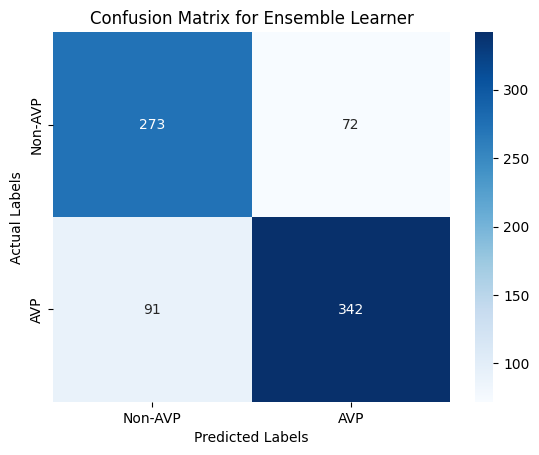

In [116]:
# Data manipulation
import pandas as pd
import numpy as np

# Text preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Handling imbalanced datasets
from imblearn.over_sampling import SMOTE

# Model selection and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Machine Learning models
from sklearn.ensemble import (VotingClassifier, StackingClassifier,
                              RandomForestClassifier, GradientBoostingClassifier,
                              AdaBoostClassifier, ExtraTreesClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier  # Ensure you have xgboost installed

# Evaluation metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, f1_score, 
                             recall_score, precision_score, 
                             mean_absolute_error, mean_squared_error, 
                             roc_curve, roc_auc_score)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
data = pd.read_csv('/kaggle/input/avped-dataset/AntiVped.csv')

# Data preprocessing
numeric_columns = ['molecular \nweight', 'Theoretical Pi', 'Extinction \ncoefficient', 
                   'Half life\n(hours)', 'Instability\n index', 'Aliphatic\n index', 
                   'GRAVY', 'Hydrophobic \nresidue :', 'Net charge:', 
                   'Boman Index:\n(Kcal/mol)', 'Protective Antigenic\n Score']

data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Fill missing values
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
data['Allergenicity'] = data['Allergenicity'].fillna(data['Allergenicity'].mode()[0])

# Clean up the column names
data.columns = data.columns.str.replace('\n', '').str.strip()

# Encode the 'Allergenicity' column using LabelEncoder
label_encoder = LabelEncoder()
data['Allergenicity'] = label_encoder.fit_transform(data['Allergenicity'])

# Get unique amino acids in the dataset and create encoding
all_amino_acids = set(''.join(data['Sequence'].tolist()))
amino_acid_to_index = {amino_acid: i for i, amino_acid in enumerate(all_amino_acids)}

# Preprocess sequence data
sequences_encoded = []
for sequence in data['Sequence']:
    encoded_sequence = [amino_acid_to_index[amino_acid] for amino_acid in sequence]
    sequences_encoded.append(encoded_sequence)

# Pad the sequences
max_sequence_length = max(len(seq) for seq in sequences_encoded)
sequences_padded = pad_sequences(sequences_encoded, maxlen=max_sequence_length, padding='post')
data['Sequence_Encoded'] = sequences_padded.tolist()

# Ensure the correct target column name here
y = data['property = 1']  # Replace with the actual name of the target column

# Select the features for X
X = data[['molecular weight', 'Extinction coefficient', 'Theoretical Pi', 
          'Half life(hours)', 'Instability index', 'Aliphatic index', 'GRAVY', 
          'Hydrophobic residue :', 'Net charge:', 'Boman Index:(Kcal/mol)', 
          'Protective Antigenic Score', 'Allergenicity']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the padded sequences to a numpy array
X_train_sequences_flat = np.array(sequences_padded[:len(X_train)])
X_test_sequences_flat = np.array(sequences_padded[len(X_train):])

# Combine the flattened sequence data with numeric features
X_train_combined = np.hstack((X_train_sequences_flat, X_train.values))
X_test_combined = np.hstack((X_test_sequences_flat, X_test.values))

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_combined, y_train)

# Initialize classifiers
classifiers = {
    "XGB": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "ETC": ExtraTreesClassifier(n_estimators=100, max_depth=5),
    "SVM": SVC(probability=True),
    "ADA": AdaBoostClassifier(n_estimators=100)
}

# Train classifiers and collect predictions
predictions = []
for name, clf in classifiers.items():
    clf.fit(X_train_balanced, y_train_balanced)  # Use balanced data here
    y_pred = clf.predict(X_test_combined)  # Use combined data here
    predictions.append(y_pred)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred)}")

# Genetic Algorithm (simple ensemble)
# Initialize random population of classifier weights
population_size = 10
num_classifiers = len(classifiers)
num_generations = 50
mutation_rate = 0.1

def initialize_population(size, num_classifiers):
    return np.random.rand(size, num_classifiers)

def fitness(weights, predictions, y_true):
    weighted_preds = np.zeros_like(predictions[0], dtype=float)
    for i in range(num_classifiers):
        weighted_preds += weights[i] * predictions[i]
    final_preds = np.round(weighted_preds / np.sum(weights))  # Final ensemble decision
    return accuracy_score(y_true, final_preds)

def mutate(weights):
    if np.random.rand() < mutation_rate:
        idx = np.random.randint(0, len(weights))
        weights[idx] = np.random.rand()
    return weights

def crossover(parent1, parent2):
    crossover_point = np.random.randint(0, num_classifiers)
    child = np.concatenate([parent1[:crossover_point], parent2[crossover_point:]])
    return child

# Genetic Algorithm Loop
population = initialize_population(population_size, num_classifiers)

for generation in range(num_generations):
    # Evaluate fitness of each individual
    fitness_scores = [fitness(ind, predictions, y_test) for ind in population]
    
    # Select the best individuals (elitism)
    sorted_idx = np.argsort(fitness_scores)[::-1]
    population = [population[i] for i in sorted_idx[:population_size // 2]]
    
    # Crossover and mutation
    for _ in range(population_size // 2):
        parent_indices = np.random.choice(len(population), size=2, replace=False)
        parent1, parent2 = population[parent_indices[0]], population[parent_indices[1]]
        child = mutate(crossover(parent1, parent2))
        population.append(child)
    
    # Best individual
    best_fitness = max(fitness_scores)
    print(f"Generation {generation}: Best fitness = {best_fitness}")

# Use the best weights for final predictions
best_weights = population[np.argmax(fitness_scores)]
weighted_preds = np.zeros_like(predictions[0], dtype=float)
for i in range(num_classifiers):
    weighted_preds += best_weights[i] * predictions[i]

final_preds = np.round(weighted_preds / np.sum(best_weights))
print(f"\n\nEnsemble Learner Accuracy: {accuracy_score(y_test, final_preds)}")

# Collect ROC data for the ensemble model
y_pred_probs = np.zeros((len(y_test), len(classifiers)))  # Collect probabilities for ROC
for i, clf in enumerate(classifiers.values()):
    y_pred_probs[:, i] = clf.predict_proba(X_test_combined)[:, 1]

roc_auc = roc_auc_score(y_test, np.mean(y_pred_probs, axis=1))  # Average probabilities for ROC AUC

# Calculate metrics
f1 = f1_score(y_test, final_preds)
recall = recall_score(y_test, final_preds)
precision = precision_score(y_test, final_preds)
mae = mean_absolute_error(y_test, final_preds)
rmse = mean_squared_error(y_test, final_preds, squared=False)
cm = confusion_matrix(y_test, final_preds)

# Calculate specificity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Calculate Matthews Correlation Coefficient
mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5 if (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn) > 0 else 0

# Print metrics
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

# Create and save a heatmap of the confusion matrix
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=["Non-AVP", "AVP"], yticklabels=["Non-AVP", "AVP"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for Ensemble Learner")
plt.savefig('Confusion_Ensemble_Learner.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

# Store ROC curve data
fpr, tpr, _ = roc_curve(y_test, np.mean(y_pred_probs, axis=1))  # Assuming binary classification

roc_data['Ensemble_Learner'] = (fpr, tpr, roc_auc)

# Yan et al. 2024 (AntiCVP-Deep)

Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.5589 - loss: 0.6937 - val_accuracy: 0.6515 - val_loss: 0.6169
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6586 - loss: 0.6297 - val_accuracy: 0.6455 - val_loss: 0.6225
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6526 - loss: 0.6349 - val_accuracy: 0.6197 - val_loss: 0.6544
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.6745 - loss: 0.6201 - val_accuracy: 0.6470 - val_loss: 0.6224
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6508 - loss: 0.6333 - val_accuracy: 0.6515 - val_loss: 0.6129
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6618 - loss: 0.6271 - val_accuracy: 0.6561 - val_loss: 0.6225
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6821 - loss: 0.6064 - val_accuracy: 0.6545 - val_loss: 0.6165
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6799 - loss: 0.6022 - val_accuracy: 0.

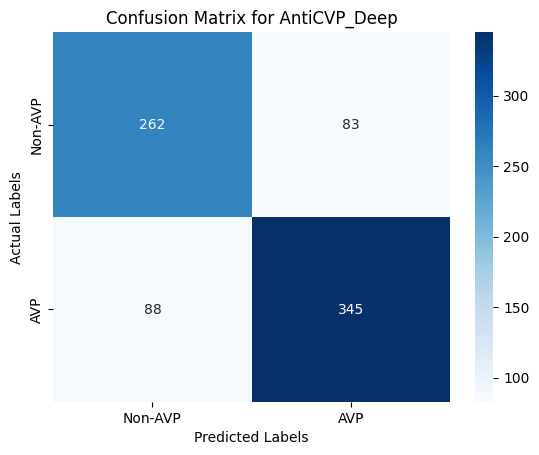

In [117]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Bidirectional, LSTM, Dense, Dropout, Attention, GlobalAveragePooling1D
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (confusion_matrix, accuracy_score, f1_score, 
                             recall_score, precision_score, 
                             mean_absolute_error, mean_squared_error, 
                             roc_curve, roc_auc_score)
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
data = pd.read_csv('/kaggle/input/avped-dataset/AntiVped.csv')

# Data preprocessing
numeric_columns = ['molecular \nweight', 'Theoretical Pi', 'Extinction \ncoefficient', 
                   'Half life\n(hours)', 'Instability\n index', 'Aliphatic\n index', 
                   'GRAVY', 'Hydrophobic \nresidue :', 'Net charge:', 
                   'Boman Index:\n(Kcal/mol)', 'Protective Antigenic\n Score']

data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
data['Allergenicity'] = data['Allergenicity'].fillna(data['Allergenicity'].mode()[0])
data.columns = data.columns.str.replace('\n', '').str.strip()

# Encode the 'Allergenicity' column
label_encoder = LabelEncoder()
data['Allergenicity'] = label_encoder.fit_transform(data['Allergenicity'])

# Prepare sequence data
all_amino_acids = set(''.join(data['Sequence'].tolist()))
amino_acid_to_index = {amino_acid: i for i, amino_acid in enumerate(all_amino_acids)}
sequences_encoded = [[amino_acid_to_index[amino_acid] for amino_acid in sequence] for sequence in data['Sequence']]
max_sequence_length = max(len(seq) for seq in sequences_encoded)
sequences_padded = pad_sequences(sequences_encoded, maxlen=max_sequence_length, padding='post')

# Prepare target variable
y = data['property = 1']  # Replace with the actual name of the target column
X = data[['molecular weight', 'Extinction coefficient', 'Theoretical Pi', 
          'Half life(hours)', 'Instability index', 'Aliphatic index', 'GRAVY', 
          'Hydrophobic residue :', 'Net charge:', 'Boman Index:(Kcal/mol)', 
          'Protective Antigenic Score', 'Allergenicity']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_sequences = sequences_padded[X_train.index]
X_test_sequences = sequences_padded[X_test.index]

# Reshape for LSTM
X_train_reshaped = X_train_sequences.reshape(X_train_sequences.shape[0], max_sequence_length, 1)
X_test_reshaped = X_test_sequences.reshape(X_test_sequences.shape[0], max_sequence_length, 1)

# Combine numerical features with sequence data for SMOTE
X_train_combined = np.hstack((X_train.values, X_train_sequences))
X_test_combined = np.hstack((X_test.values, X_test_sequences))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_combined, y_train)

# Convert target variable to categorical
num_classes = len(np.unique(y))
y_train_balanced_categorical = to_categorical(y_train_balanced, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)

# Final reshape for the LSTM
X_train_sequences_balanced = X_train_balanced[:, :max_sequence_length].reshape(-1, max_sequence_length, 1)
X_test_sequences = X_test_combined[:, :max_sequence_length].reshape(-1, max_sequence_length, 1)

# Define the model
def create_anticvp_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Bidirectional(LSTM(64, return_sequences=True))(inputs)
    attention = Attention()([x, x])
    x = GlobalAveragePooling1D()(attention)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and compile the model
AntiCVP_Deep = create_anticvp_model((max_sequence_length, 1))

# Train the model
AntiCVP_Deep.fit(X_train_sequences_balanced, y_train_balanced_categorical, 
                 epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
AntiCVP_Deep_loss, AntiCVP_Deep_accuracy = AntiCVP_Deep.evaluate(X_test_sequences, y_test_categorical)
print(f'AntiCVP_Deep Accuracy: {AntiCVP_Deep_accuracy:.4f}')

# Predictions for evaluation metrics
y_pred_probs = AntiCVP_Deep.predict(X_test_sequences)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate metrics
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
roc_auc = roc_auc_score(y_test_categorical, y_pred_probs, multi_class='ovr')
cm = confusion_matrix(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Calculate Matthews Correlation Coefficient
mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5 if (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn) > 0 else 0

# Print metrics
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

# Create and save a heatmap of the confusion matrix
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=["Non-AVP", "AVP"], yticklabels=["Non-AVP", "AVP"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for AntiCVP_Deep")
plt.savefig('Confusion_AntiCVP_Deep.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

# Store ROC curve data
fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1])  # Assuming binary classification

roc_data['AntiCVP_Deep'] = (fpr, tpr, roc_auc)

# Roc Curve

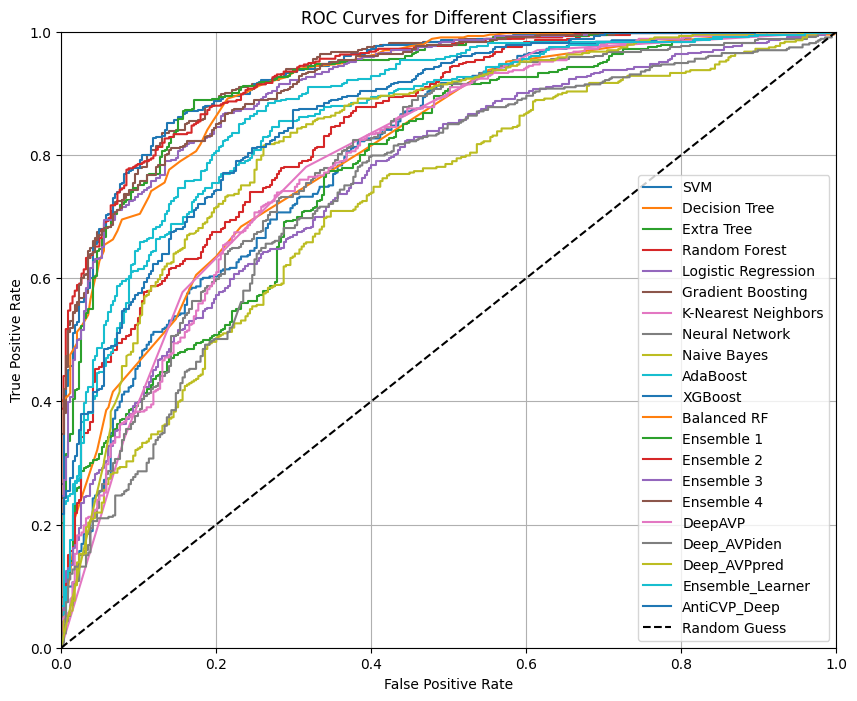

In [118]:
# Plot all ROC curves in a single plot
Rocsaved = plt.figure(figsize=(10, 8))
for name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{name}')

# Plot the random guess line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Set the axis limits to start from (0, 0)
plt.xlim(0, 1)
plt.ylim(0, 1)

# Set the labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Classifiers')
plt.legend(loc='lower right')
plt.grid()

# Save the ROC curve figure
Rocsaved.savefig('ROC Curve.png', format='png', dpi=600, bbox_inches="tight")
plt.show()